<h1><center>Sprint 4</center></h1>
<h2><center>Tasca 2</center></h2>

### Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import random
import datetime as dt
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint04/data/'
data_path = Path(data_path)
plot_path = 'D:/Sistema_Solar/Python/itacademy/itacademy-datascience/sprint04/plots/'
plot_path = Path(plot_path)

Anem a obrir l'arxiu "movies.dat". Podem observar que s'importa com un string molt llarg.

In [78]:
file_name = 'movies.dat'
file = data_path / file_name
# Obrim l'arxiu
with open(file) as movies:
#    print(datFile.read())
    movies_split0 = movies.read()
print(len(movies_split0))
print(movies_split0[0:200])

171308
1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the B


Per a convertir-lo en un dataframe, farem:

1. Cada pel·lícula la separarem gràcies als salts de línia que hi ha entre ells. Obtenim una llista amb cada pel·lícula com a un ítem.
2. Cada pel·lícula té 3 camps separats per "::". Ho tornem a separar i descartarem el primer cap que és una mena de id.
3. El segón camp conté el nom en anglès i entre parentesis pot haver-hi fins a 2 noms (nom alternatiu en anglès i nom original), i l'any de publicació, podem separar-ho gràcies a que l'any és troba dintre de parèntesis cada informació. El tercer camp conté els géneres, separats per "|" i voldrem tindre cada génere en un camp diferent en el dataframe.

In [70]:
# Obrim l'arxiu
with open(file) as movies:
#    print(datFile.read())
    movies_split0 = movies.read().splitlines()

In [71]:
movies_split1 = []
for movie in movies_split0:
    movies_split1.append(movie.split('::'))

In [103]:
movies_split2 = []
for movie in movies_split1:
    movie_split = []
    orig_name_year = movie[1].split('(')
    movie_split.append(orig_name_year[0])
    if len(orig_name_year) == 2:
        movie_split.append('')
        movie_split.append('')
        movie_split.append(orig_name_year[1].replace(')',''))
    elif len(orig_name_year) == 3:
        movie_split.append('')
        movie_split.append(orig_name_year[1].replace(')',''))
        movie_split.append(orig_name_year[2].replace(')',''))
    elif len(orig_name_year) == 4:
        movie_split.append(orig_name_year[1].replace(')',''))
        movie_split.append(orig_name_year[2].replace(')',''))
        movie_split.append(orig_name_year[3].replace(')',''))
    movie_genres = movie[2].split('|')
    for genre in movie_genres:
        movie_split.append(genre)
    movies_split2.append(movie_split)

In [104]:
movies_df = pd.DataFrame(movies_split2, columns = ['Name_1', 'Name_2', 'Name_3', 'Release_Year', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6'])

In [105]:
movies_df

,Name_1,Name_2,Name_3,Release_Year,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6
0,Toy Story,,,1995,Animation,Children's,Comedy,None,None,None
1,Jumanji,,,1995,Adventure,Children's,Fantasy,None,None,None
2,Grumpier Old Men,,,1995,Comedy,Romance,None,None,None,None
3,Waiting to Exhale,,,1995,Comedy,Drama,None,None,None,None
4,Father of the Bride Part II,,,1995,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,,,2000,Comedy,None,None,None,None,None
3879,Requiem for a Dream,,,2000,Drama,None,None,None,None,None
3880,Tigerland,,,2000,Drama,None,None,None,None,None
3881,Two Family House,,,2000,Drama,None,None,None,None,None


In [ ]:
# Ep, comprovem els tipus de les dades de la nostra dataframe
movies_df.dtypes

In [ ]:
# Ens interesa que l'any estigui en integer
Release_Year['Release_Year'] = Release_Year['Release_Year'] .astype(int)

In [101]:
file_name = 'movies.csv'
file = data_path / file_name

movies_df.to_csv(file)

### Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

Propostes:
    
- Pel·lícules per any
- Géneres més freqüents

Anem a veure el número de pel·lícules publicades:

In [106]:
movies_df['Release_Year'].value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: Release_Year, Length: 81, dtype: int64

In [110]:
movies_df['Release_Year'].max()

'2000'

El nombre de pel·lícules publicades s'ha anat incrementant de manera molt notable amb un creixement sostingut, més lentament fins la década dels 70-80 on fa una pujada important i, molt espécialment, en la década dels 90.

Text(0.5, 1.0, "Frecuència en l'any de publació")

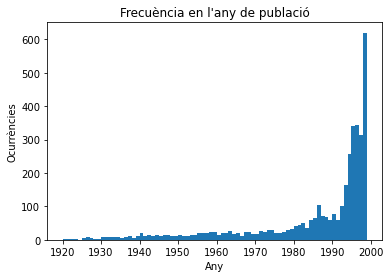

In [122]:
plt.hist(movies_df['Release_Year'], bins=np.arange(1920, 2000, 1))
plt.xlabel('Any')
plt.ylabel('Ocurrències')
plt.title('Frecuència en l\'any de publació')

#file = plot_path / str('Fig01_Hist_hab.png')
#plt.savefig(file, dpi=200, pad_inches=0.1, bbox_inches='tight')

Anem a contar també el número de pel·lícules per génere. Per a això, crearem un diccionari i contarem cada ocurréncia.

In [134]:
genre_count = {}
#for index, row in df.iterrows():
#    print(row['c1'], row['c2'])
for index, row in movies_df.iterrows():
    print(movie)

(3882, Name_1          Contender, The 
Name_2                         
Name_3                         
Release_Year               2000
Genre_1                   Drama
Genre_2                Thriller
Genre_3                    None
Genre_4                    None
Genre_5                    None
Genre_6                    None
Name: 3882, dtype: object)
(3882, Name_1          Contender, The 
Name_2                         
Name_3                         
Release_Year               2000
Genre_1                   Drama
Genre_2                Thriller
Genre_3                    None
Genre_4                    None
Genre_5                    None
Genre_6                    None
Name: 3882, dtype: object)
(3882, Name_1          Contender, The 
Name_2                         
Name_3                         
Release_Year               2000
Genre_1                   Drama
Genre_2                Thriller
Genre_3                    None
Genre_4                    None
Genre_5                    No

In [130]:
movies_df['Name_1']

0                         Toy Story 
1                           Jumanji 
2                  Grumpier Old Men 
3                 Waiting to Exhale 
4       Father of the Bride Part II 
                    ...             
3878               Meet the Parents 
3879            Requiem for a Dream 
3880                      Tigerland 
3881               Two Family House 
3882                 Contender, The 
Name: Name_1, Length: 3883, dtype: object